In [1]:
# T6
import numpy as np

m = np.array([10, 181, 9])
Np = np.array([201**2/(2*400), 199*201/400, 199**2/(2*400)])
d = np.sum((m-Np)**2/Np)
print(d)

131.23466177606713


In [2]:
from scipy.stats import chi2
import scipy.integrate as integrate

p_value = integrate.quad(lambda x : chi2.pdf(x, 1), d, np.inf)
print(p_value)

(2.1999842836682467e-30, 1.4124213266730983e-31)


In [3]:
# T7
A = np.array([[77/200, 91/200, 32/200], [77/200, 91/200, 32/200]])
B = np.array([[0.5, 0.5, 0.5], [0.5, 0.5, 0.5]])
m = np.array([[25, 50, 25], [52, 41, 7]])
d = np.sum((m - 200*A*B)**2/(200*A*B))
print(d)

20.48264235764236


In [4]:
p_value = integrate.quad(lambda x : chi2.pdf(x, 2), d, np.inf)
print(p_value)

(3.5665697729502794e-05, 1.2266942755903772e-09)


In [5]:
# T8
A = np.array([[72/600, 78/600, 152/600, 298/600], [72/600, 78/600, 152/600, 298/600]])
m = np.array([[33, 43, 80, 144], [39, 35, 72, 154]])
d = np.sum((m - 300*A)**2/(300*A))
print(d)

2.0771359218904255


In [6]:
p_value = integrate.quad(lambda x : chi2.pdf(x, 3), d, np.inf)
print(p_value)

(0.5565521530460767, 9.720833143883695e-12)


In [7]:
# T9 a)
m = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
Np = np.array([10,10,10,10,10,10,10,10,10,10])
d = np.sum((m-Np)**2 / Np)
print(d)

16.4


In [8]:
p_value = integrate.quad(lambda x : chi2.pdf(x, 9), d, np.inf)
print(p_value)

(0.05898403054441968, 2.513395414959647e-10)


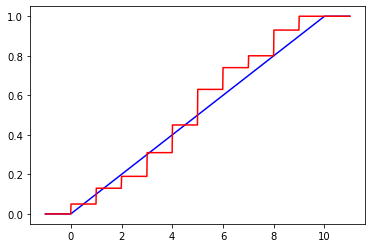

In [9]:
import matplotlib.pyplot as plt

def F_emp(x, M = m):
    if x <= 0:
        return 0
    if x > 9:
        return 1
    for i in range(len(M)):
        if x > i and x <= i+1:
            return np.sum(M[0:i+1])/np.sum(M)
        
def F(x):
    if x < 0:
        return 0
    if x >= 10:
        return 1
    return 0.1*x

# Проверка
x = np.linspace(-1, 11, 1000)
y1 = [F(X) for X in x]
y2 = [F_emp(X) for X in x]
plt.plot(x, y1, c='blue')
plt.plot(x, y2, c='red')
plt.show()

In [10]:
N = 100
d = -np.inf
for x in range(0,10):
    d = max(d, abs(F_emp(x) - F(x)), abs(F_emp(x+1) - F(x)))
d *= N**0.5
print(d)

1.399999999999999


In [11]:
from math import exp

def K(x):
    res = 1
    for k in range(1, 100000):
        res += 2 * (-1)**k * exp(-2 * k**2 * x**2)
    return res

p_value = 1 - K(d)
print(p_value)

0.03968187953811464


In [12]:
# T9 b) -> Пирсон, ОМПГ
from scipy.optimize import minimize, Bounds
from math import isinf

def N(a,b,C,D):
    def f(x):
        return 1/(2*np.pi*b)**0.5 * exp(-(x-a)**2/(2*b))
    res = integrate.quad(f, C, D)
    return res[0]
    

def minus_L(params, M = m): # - L
    a,b = params
    res = N(a,b,-np.inf,1) ** M[0]
    for i in range(1, 8+1):
        res *= N(a,b,i,i+1) ** M[i]
    res *= N(a,b,9,np.inf) ** M[9]
    return -res

x0 = np.array([5,1])
res = minimize(minus_L, x0, method='Nelder-Mead')
print(res.x)

[5.28966139 7.17978319]


In [13]:
a,b = res.x
P = np.array([N(a,b,i,i+1) for i in range(0,10)])
P[0] = N(a,b,-np.inf,1)
P[9] = N(a,b,9,np.inf)

n = 100
Np = n*P
print(Np)

[ 5.46982518  5.50798121  8.66340182 11.8737924  14.18072648 14.75765223
 13.38277616 10.57509688  7.28164342  8.30710421]


In [14]:
d = np.sum((m-Np)**2 / Np)
print(d)

9.802589870491952


In [15]:
p_value = integrate.quad(lambda x : chi2.pdf(x, 7), d, np.inf)
print(p_value)

(0.20003927298797472, 5.283144036828307e-10)


In [16]:
def F_emp(x, M):
    if x <= 0:
        return 0
    if x > 9:
        return 1
    for i in range(len(M)):
        if x > i and x <= i+1:
            return np.sum(M[0:i+1])/np.sum(M)

def N(a,b,C,D):
    def f(x):
        return 1/(2*np.pi*b)**0.5 * exp(-(x-a)**2/(2*b))
    res = integrate.quad(f, C, D)
    return res[0]

def FN(x, A=a, B=b):
    return N(A,B,-np.inf,x)

NN = 50000
n = 100

Delta = []
for i in range(NN):
    Xn = np.random.normal(loc = a, scale = b**0.5, size = n)
    M = [0,0,0,0,0,0,0,0,0,0]
    for j in range(len(Xn)):
        if Xn[j] < 1:
            M[0] += 1
        if Xn[j] >= 9:
            M[9] += 1
        for k in range(1, 8+1):
            if Xn[j] >= k and Xn[j] < k+1:
                M[k] += 1
    x0 = np.array([5,1])
    teta_star = minimize(minus_L, x0, M, method='Nelder-Mead')
    a_star, b_star = teta_star.x
    d = -np.inf
    for x in range(0,10):
        d = max(d, abs(F_emp(x, M) - FN(x, a_star, b_star)),
                abs(F_emp(x+1, M) - FN(x, a_star, b_star)))
    d *= n**0.5
    
    Delta.append(d)

Delta.sort()
delta_ = -np.inf
for x in range(0,10):
    delta_ = max(delta_, abs(F_emp(x, m) - FN(x, a, b)),
            abs(F_emp(x+1, m) - FN(x, a, b)))
delta_ *= n**0.5


def p_val(Delta, delta_):
    for i in range(len(Delta)):
        if Delta[i] >= delta_:
            return (len(Delta) - i)/len(Delta)
print(p_val(Delta, delta_))  

0.35496
